# <center> Segmentation de la clientèle

# 1. Introduction

## 1.1 Libraries

In [4]:
pip install dtale

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os

# Tableau
import numpy as np
import pandas as pd

# Grapique
import matplotlib.pyplot as plt
import seaborn as sns

# Initiation kmeans : n_clusters
from yellowbrick.cluster import KElbowVisualizer

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn import preprocessing

import dtale

## 1.2 Data

In [2]:
# Affecter une variable avec le chemin vers le dossier
path = "C:/Users/maimo/Documents/DATA ANALYST/client/"
os.listdir(path)  # methode affichant tous les fichiers contenus dans notre dossier

['.ipynb_checkpoints',
 'client.csv',
 'customer_segmentation_data.csv',
 'Segmentation_clients30.ipynb']

In [3]:
client=pd.read_csv(path+'customer_segmentation_data.csv') # lecture du data

In [4]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


Aucune valeurs manquante

In [5]:
client.nunique()

id                      1000
age                       52
gender                     3
income                   996
spending_score           100
membership_years          10
purchase_frequency        50
preferred_category         5
last_purchase_amount     994
dtype: int64

In [6]:
client.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


# 2. Nettoyage

In [7]:
client_origin=client.copy()

## 2.1 Renommer les colonnes

In [8]:
client.columns

Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [9]:
cols_client={'gender':'genre',
             'income':'revenu',
             'spending_score':'score_depenses',
             'membership_years':'annees_adhesion',
             'purchase_frequency':'frequence_achat',
             'preferred_category':'categorie_preferee',
             'last_purchase_amount':'dernier_montant_achat'
            }

In [10]:
client=client.rename(columns=cols_client)
client.columns

Index(['id', 'age', 'genre', 'revenu', 'score_depenses', 'annees_adhesion',
       'frequence_achat', 'categorie_preferee', 'dernier_montant_achat'],
      dtype='object')

## 2.2 Mettre les series dans le bon type de données

In [11]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   int64  
 1   age                    1000 non-null   int64  
 2   genre                  1000 non-null   object 
 3   revenu                 1000 non-null   int64  
 4   score_depenses         1000 non-null   int64  
 5   annees_adhesion        1000 non-null   int64  
 6   frequence_achat        1000 non-null   int64  
 7   categorie_preferee     1000 non-null   object 
 8   dernier_montant_achat  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [12]:
client['id']=client['id'].astype(str)
client['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: id
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


## 2.3 Traduire les valeurs des series en français

In [13]:
cols_objet = client.select_dtypes( exclude=np.number).columns  # les colonnes non numériques
cols_objet

Index(['id', 'genre', 'categorie_preferee'], dtype='object')

### 2.3.1 Genre

In [14]:
client['genre'].unique()

array(['Female', 'Other', 'Male'], dtype=object)

In [15]:
client['genre']=client['genre'].replace(['Female', 'Other', 'Male'],['Femme','Autre','Homme'])
client['genre'].unique()

array(['Femme', 'Autre', 'Homme'], dtype=object)

### 2.3.2 Catégorie préférées

In [16]:
client['categorie_preferee'].unique()

array(['Groceries', 'Sports', 'Clothing', 'Home & Garden', 'Electronics'],
      dtype=object)

In [17]:
client['categorie_preferee']=client['categorie_preferee'].replace(['Groceries', 'Sports', 'Clothing', 'Home & Garden', 'Electronics'],
                                                                  ['Épicerie', 'Sports', 'Vêtements', 'Maison et jardin', 'Électronique']
                                                                 )

In [18]:
client['categorie_preferee'].unique()

array(['Épicerie', 'Sports', 'Vêtements', 'Maison et jardin',
       'Électronique'], dtype=object)

## 2.4 Valeurs manquantes

In [19]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   object 
 1   age                    1000 non-null   int64  
 2   genre                  1000 non-null   object 
 3   revenu                 1000 non-null   int64  
 4   score_depenses         1000 non-null   int64  
 5   annees_adhesion        1000 non-null   int64  
 6   frequence_achat        1000 non-null   int64  
 7   categorie_preferee     1000 non-null   object 
 8   dernier_montant_achat  1000 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


aucune valeurs manquantes

## 2.5 Valeurs très corrélées

In [20]:
cols_num = client.select_dtypes( include=np.number).columns  # les colonnes non numériques
cols_num

Index(['age', 'revenu', 'score_depenses', 'annees_adhesion', 'frequence_achat',
       'dernier_montant_achat'],
      dtype='object')

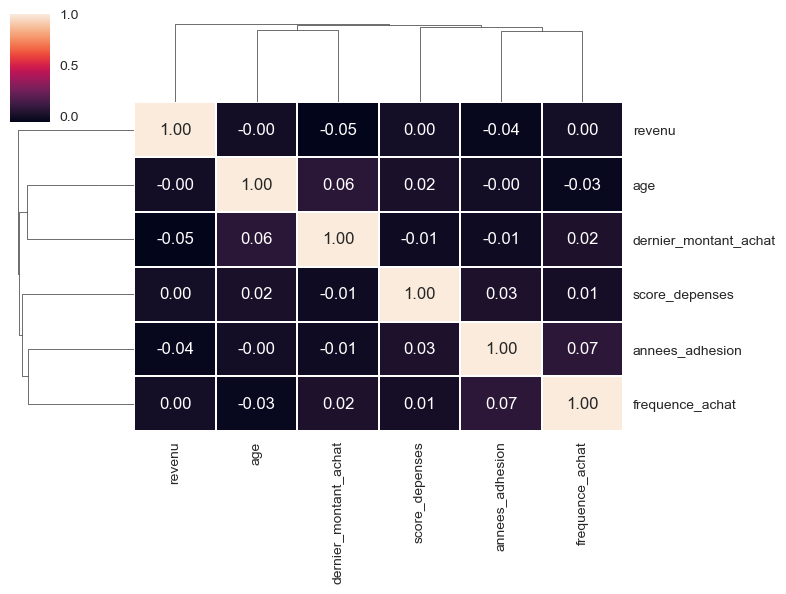

In [21]:
corr_mat = sns.clustermap(
    client.select_dtypes(include=np.number).corr(),
    annot=True,
    linewidths=0.1,
    fmt=".2f",
    figsize=(8, 6),
)
corr_mat

Aucun nettoyage pour les valeurs numériques car aucune très corrélées

## 2.6 Création de nouvelles colonnes

In [22]:
client.describe()

,age,revenu,score_depenses,annees_adhesion,frequence_achat,dernier_montant_achat
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


### 2.6.1 Categoriser score

le score est entre 0 et 100 

In [23]:
def categoriser_score(score):
    if score < 0 or score > 100:
        return "Score hors limite"
    
    if score >= 66:
        return "score élevé"
    elif score >= 36:
        return "score moyen"
    else:
        return "score faible"

In [24]:
client['categorise_score'] = client['score_depenses'].apply(categoriser_score)
client.head()

,id,age,genre,revenu,score_depenses,annees_adhesion,frequence_achat,categorie_preferee,dernier_montant_achat,categorise_score
0,1,38,Femme,99342,90,3,24,Épicerie,113.53,score élevé
1,2,21,Femme,78852,60,2,42,Sports,41.93,score moyen
2,3,60,Femme,126573,30,2,28,Vêtements,424.36,score faible
3,4,40,Autre,47099,74,9,5,Maison et jardin,991.93,score élevé
4,5,65,Femme,140621,21,3,25,Électronique,347.08,score faible


### 2.6.2 Tranche d'âge

In [25]:
def Trange_age(age):
    if age < 15 or age > 100:
        return "erreur"
    if age >= 50:
        return "+50 ans"
    elif age >= 35:
        return "35-50 ans"
    elif age >= 26:
        return "26-34 ans"
    elif age >= 18:
        return "18-25 ans"
    else:
        return "moins 18 ans"

In [26]:
client['Trange_age'] = client['age'].apply(Trange_age)
client.head()

,id,age,genre,revenu,score_depenses,annees_adhesion,frequence_achat,categorie_preferee,dernier_montant_achat,categorise_score,Trange_age
0,1,38,Femme,99342,90,3,24,Épicerie,113.53,score élevé,35-50 ans
1,2,21,Femme,78852,60,2,42,Sports,41.93,score moyen,18-25 ans
2,3,60,Femme,126573,30,2,28,Vêtements,424.36,score faible,+50 ans
3,4,40,Autre,47099,74,9,5,Maison et jardin,991.93,score élevé,35-50 ans
4,5,65,Femme,140621,21,3,25,Électronique,347.08,score faible,+50 ans


### 2.6.3 Catégorie des revenus

In [27]:
def categoriser_revenu(revenu):
    if revenu < 0:
        return "erreur valeur négative"
    if revenu >= 100000:
        return "Revenu élevé"
    elif revenu >= 50000:
        return "Revenu moyen"
    else:
        return "Revenu faible"

In [28]:
client['categorie_revenu'] = client['revenu'].apply(categoriser_revenu)
client.head()

,id,age,genre,revenu,score_depenses,annees_adhesion,frequence_achat,categorie_preferee,dernier_montant_achat,categorise_score,Trange_age,categorie_revenu
0,1,38,Femme,99342,90,3,24,Épicerie,113.53,score élevé,35-50 ans,Revenu moyen
1,2,21,Femme,78852,60,2,42,Sports,41.93,score moyen,18-25 ans,Revenu moyen
2,3,60,Femme,126573,30,2,28,Vêtements,424.36,score faible,+50 ans,Revenu élevé
3,4,40,Autre,47099,74,9,5,Maison et jardin,991.93,score élevé,35-50 ans,Revenu faible
4,5,65,Femme,140621,21,3,25,Électronique,347.08,score faible,+50 ans,Revenu élevé


# 3 Analyse

## 3.1 Genre

### 3.1.1 Distribution du genre

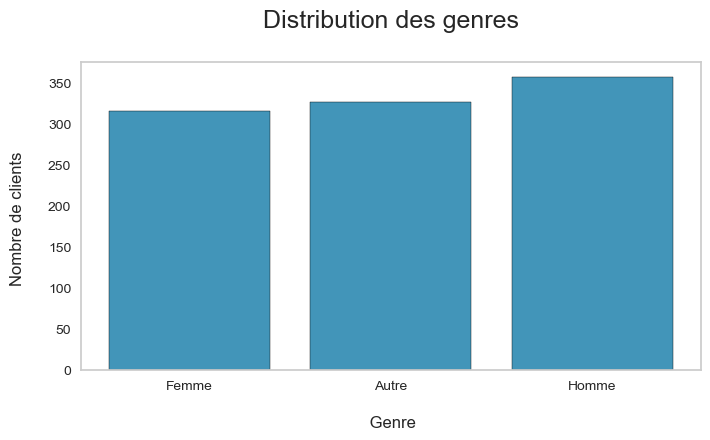

In [29]:
plt.figure(figsize=(8, 4))

# distribution genre
sns.histplot(data=client, x='genre', shrink=.8)
plt.savefig('dis_genre.png', dpi=300, bbox_inches='tight')
plt.xlabel('\n Genre', fontsize=12)  # Nom de l'axe des x
plt.ylabel('Nombre de clients \n', fontsize=12)  # Nom de l'axe des y
plt.grid()
plt.title("Distribution des genres\n", fontsize=18)
plt.show()

## 3.2 Age

### 3.2.1 Distribution âge

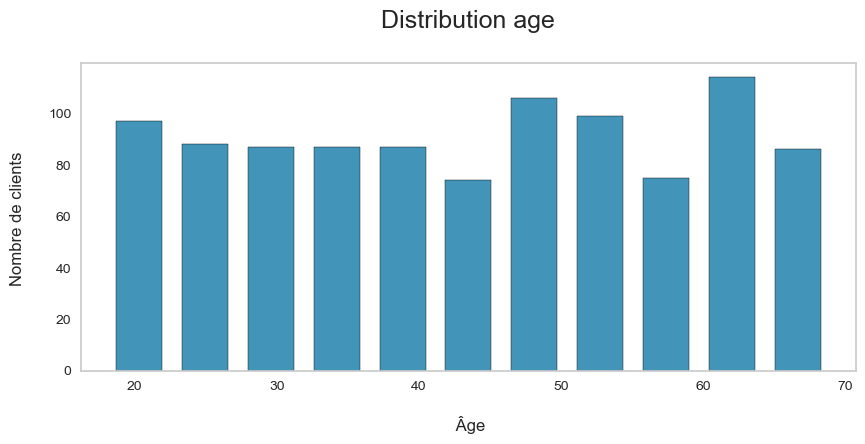

In [30]:
plt.figure(figsize=(10,4))
sns.histplot(data=client, x='age',shrink=.7)
plt.title("Distribution age\n", fontsize=18)
plt.xlabel('\n Âge', fontsize=12)  # Nom de l'axe des x
plt.ylabel('Nombre de clients \n', fontsize=12)  # Nom de l'axe des y
plt.grid()
plt.savefig('dis_age.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
print("Age maximale :",max(client['age']))
print("Age minimale :",min(client['age']))

Age maximale : 69
Age minimale : 18


### 3.2.2 Distribution des tranches d'âge

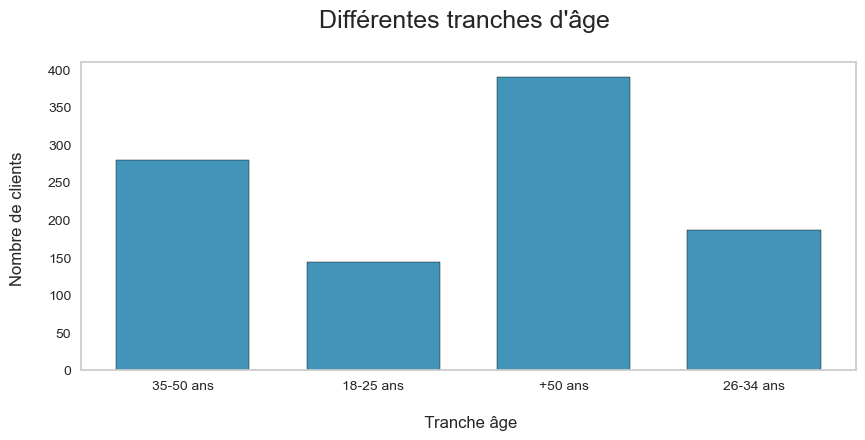

In [32]:
plt.figure(figsize=(10,4))
sns.histplot(data=client, x='Trange_age',shrink=.7)

plt.title("Différentes tranches d'âge \n", fontsize=18)
plt.xlabel('\n Tranche âge', fontsize=12)  # Nom de l'axe des x
plt.ylabel('Nombre de clients \n', fontsize=12)  # Nom de l'axe des y

plt.grid()
plt.savefig('dis_Trange_age.png', dpi=300, bbox_inches='tight')
plt.show()

## 3.3 Revenu

### 3.3.1 Distribution revenu

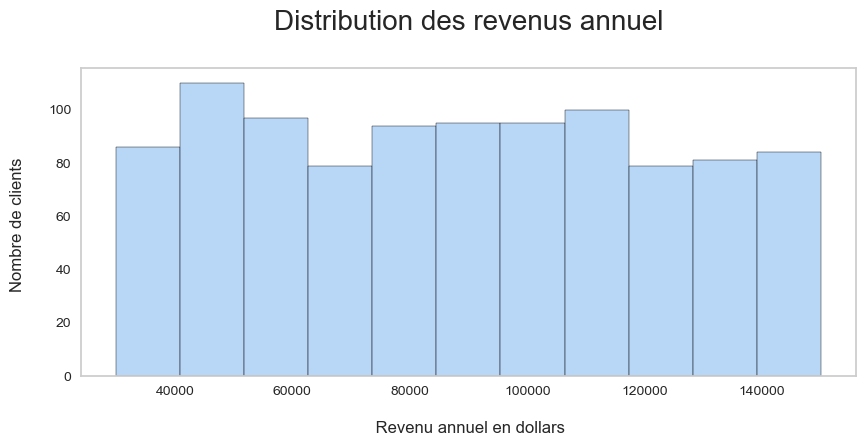

In [33]:
plt.figure(figsize=(10,4))
sns.set_palette('pastel')
sns.histplot(data=client, x='revenu')
plt.title("Distribution des revenus annuel\n", fontsize=20)

plt.xlabel('\n Revenu annuel en dollars', fontsize=12)  # Nom de l'axe des x
plt.ylabel('Nombre de clients \n', fontsize=12)  # Nom de l'axe des y
plt.grid()
plt.savefig('dis_revenu.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
print("Revenu annuel maximale en dollars :",max(client['revenu']))
print("Revenu annuel minimale en dollars :",min(client['revenu']))

Revenu annuel maximale en dollars : 149973
Revenu annuel minimale en dollars : 30004


### 3.3.2 Différents tranches de revenus

In [35]:
client["categorie_revenu"].unique()

array(['Revenu moyen', 'Revenu élevé', 'Revenu faible'], dtype=object)

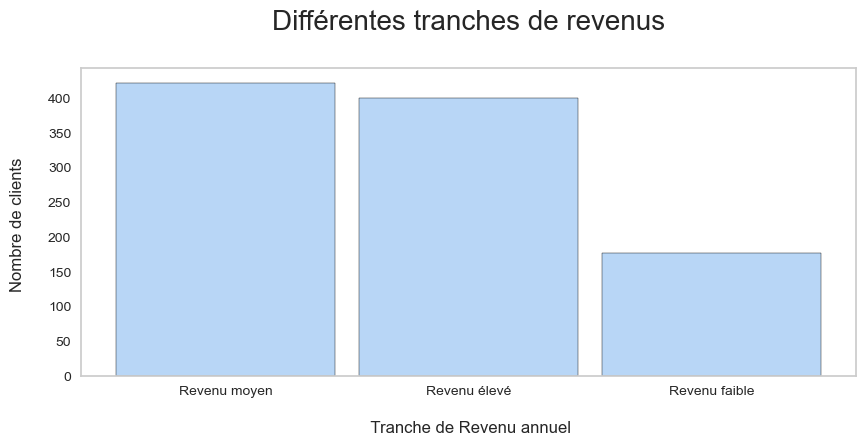

In [36]:
plt.figure(figsize=(10,4))
sns.histplot(data=client, x='categorie_revenu',shrink=.9)
plt.title("Différentes tranches de revenus\n", fontsize=20)

plt.xlabel('\n Tranche de Revenu annuel', fontsize=12)  # Nom de l'axe des x
plt.ylabel('Nombre de clients \n', fontsize=12)  # Nom de l'axe des y

plt.grid()
plt.savefig('dis_categ_revenu.png', dpi=300, bbox_inches='tight')
plt.show()

* Revenu élevé correspond à supérieur ou égale 100000 $
  
* Revenu moyen correspond à entre 50 000 et 100 000 $
  
* Revenu faible correspond à moins  100000 $

## 3.4 Années d'adhésion

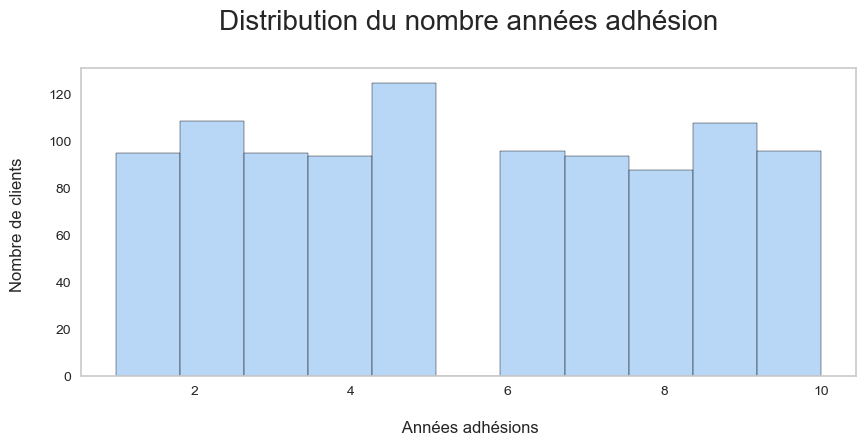

In [37]:
plt.figure(figsize=(10,4))
sns.set_palette('pastel')
sns.histplot(data=client, x='annees_adhesion')

plt.title("Distribution du nombre années adhésion\n", fontsize=20)
plt.xlabel('\n Années adhésions', fontsize=12)  # Nom de l'axe des x
plt.ylabel('Nombre de clients \n', fontsize=12)  # Nom de l'axe des y 

plt.grid()
plt.savefig('dis_annee.png', dpi=300, bbox_inches='tight')
plt.show()

## 3.5 Fréquence d'achat

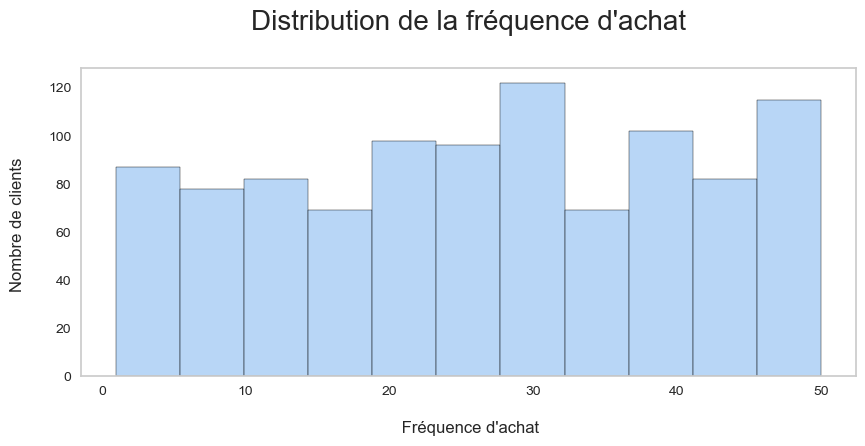

In [38]:
plt.figure(figsize=(10,4))
sns.set_palette('pastel')
sns.histplot(data=client, x='frequence_achat')

plt.title("Distribution de la fréquence d'achat\n", fontsize=20)
plt.xlabel('\n Fréquence d\'achat', fontsize=12)  # Nom de l'axe des x
plt.ylabel('Nombre de clients \n', fontsize=12)  # Nom de l'axe des y 
plt.grid()
plt.savefig('dis_feq.png', dpi=300, bbox_inches='tight')
plt.show()

## 3.6 Catégories préférées

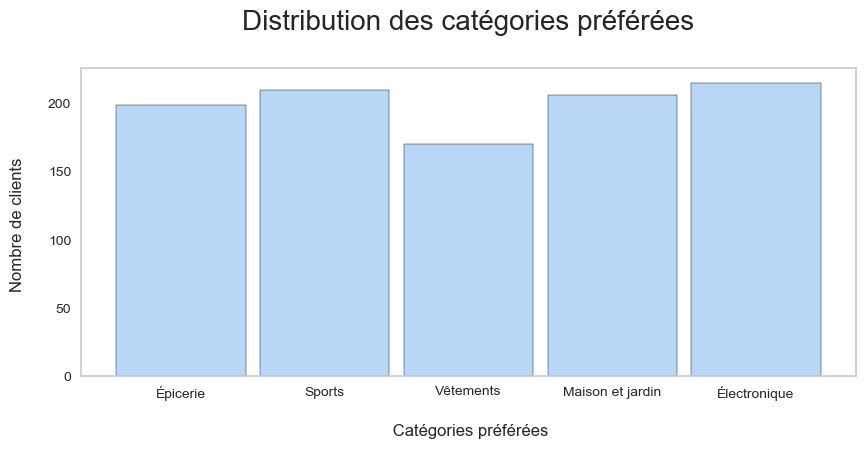

In [39]:
plt.figure(figsize=(10,4))
sns.set_palette('pastel')
categ=sns.histplot(data=client, x='categorie_preferee',shrink=.9)

plt.title("Distribution des catégories préférées\n", fontsize=20)
plt.xlabel('\n Catégories préférées', fontsize=12)  
plt.ylabel('Nombre de clients \n', fontsize=12)  
plt.grid()
plt.savefig('dis_categ.png', dpi=300, bbox_inches='tight')
plt.show()

## 3.7 Dernier montant d'achat

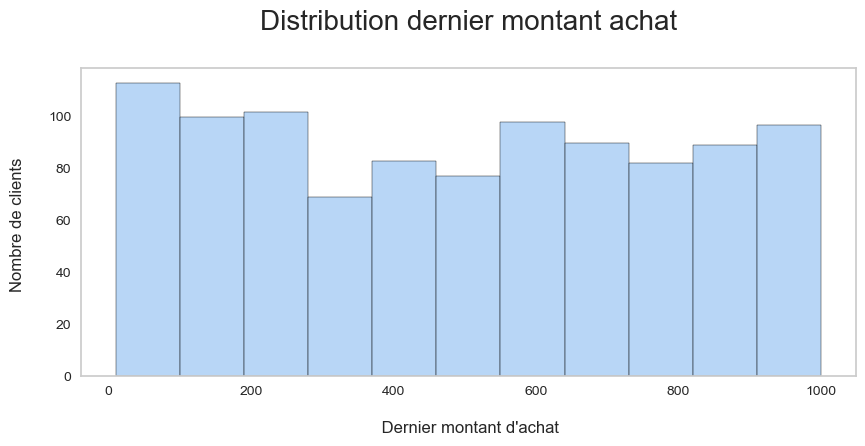

In [40]:
plt.figure(figsize=(10,4))
sns.set_palette('pastel')
sns.histplot(data=client, x='dernier_montant_achat')
plt.title("Distribution dernier montant achat\n", fontsize=20)
plt.xlabel('\n Dernier montant d\'achat', fontsize=12)  
plt.ylabel('Nombre de clients \n', fontsize=12)  
plt.grid()
plt.savefig('dis_dernier_montant.png', dpi=300, bbox_inches='tight')
plt.show()

## 3.8 Score

### 3.8.1 Distribution du score

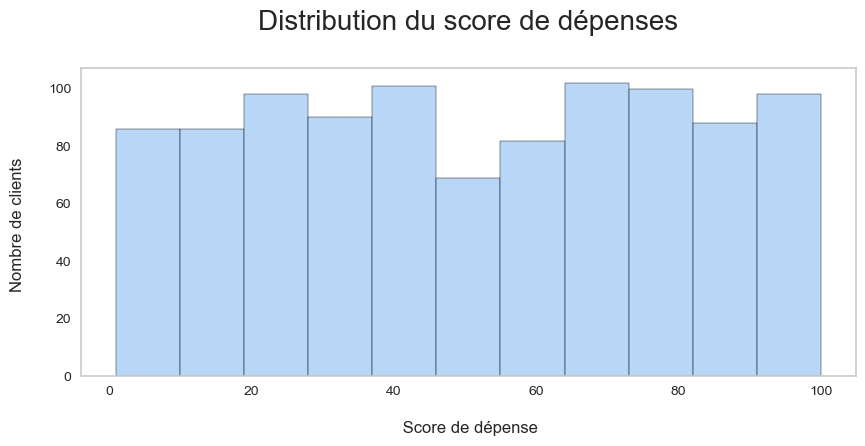

In [41]:
plt.figure(figsize=(10,4))
sns.set_palette('pastel')
sns.histplot(data=client, x='score_depenses')
plt.title("Distribution du score de dépenses\n", fontsize=20)
plt.xlabel('\n Score de dépense', fontsize=12)  
plt.ylabel('Nombre de clients \n', fontsize=12)  
plt.grid()
plt.savefig('dis_score.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.8.2 Distribution des catégorie de score

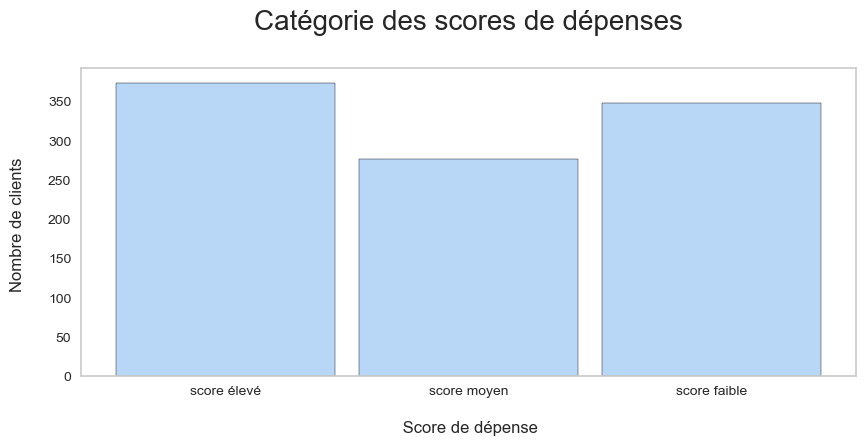

In [42]:
plt.figure(figsize=(10,4))
sns.set_palette('pastel')
sns.histplot(data=client, x='categorise_score',shrink=.9)
plt.title("Catégorie des scores de dépenses\n", fontsize=20)
plt.xlabel('\n Score de dépense', fontsize=12)  
plt.ylabel('Nombre de clients \n', fontsize=12)  
plt.grid()
plt.savefig('score_categ.png', dpi=300, bbox_inches='tight')
plt.show()

* score élevé correspond à  un score supérieur ou égale à 66 
  
* score moyen correspond à score entre 36 et 66
  
* score faible correspond à score inférieur à 36

### 3.8.3 Relation entre le genre et la catégorie score

In [114]:
# une fonction créant un tableau croisé entre la catégorie de score et une variable
def heat_categ_score(variable):
    heat2 = pd.crosstab(
    client[variable], client["categorise_score"])
    plt.figure(figsize=(8, 6))
    sns.heatmap(heat2, cmap="YlGnBu", annot=True)
    plt.tick_params(
    axis="both",
    which="major",
    labelsize=10,
    labelbottom=False,
    bottom=False,
    top=False,
    labeltop=True,)
    nom_fichier="relation_score_"+variable+".png"
    plt.savefig(nom_fichier, dpi=300, bbox_inches='tight')
    

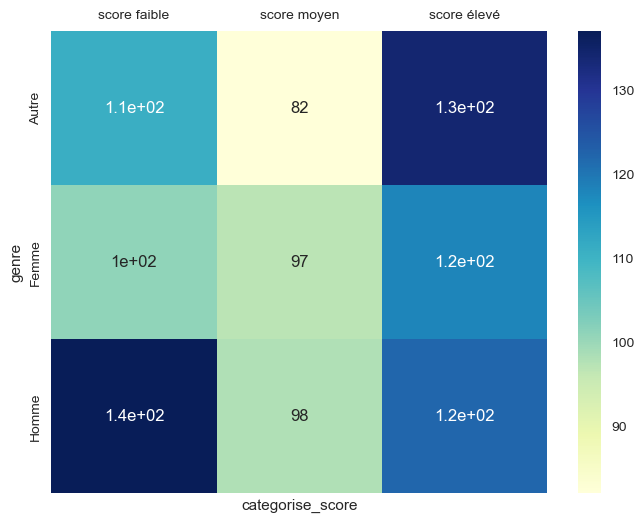

In [115]:
heat_categ_score('genre')

### 3.8.4 Relation tranche d'âge et catégorie score

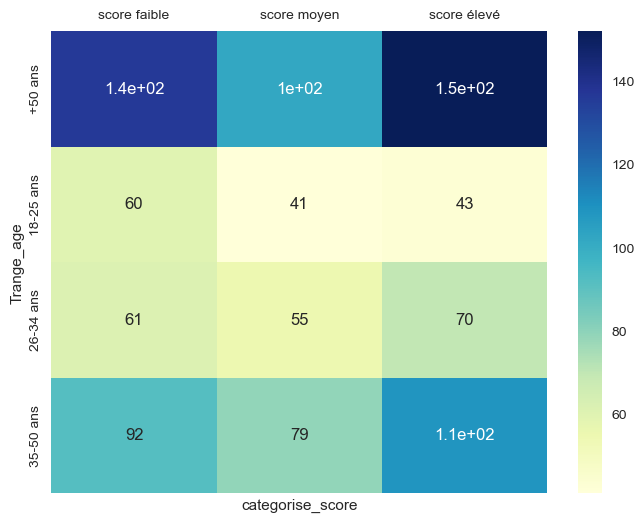

In [116]:
heat_categ_score('Trange_age')

### 3.8.5 Relation revenu et catégorie score

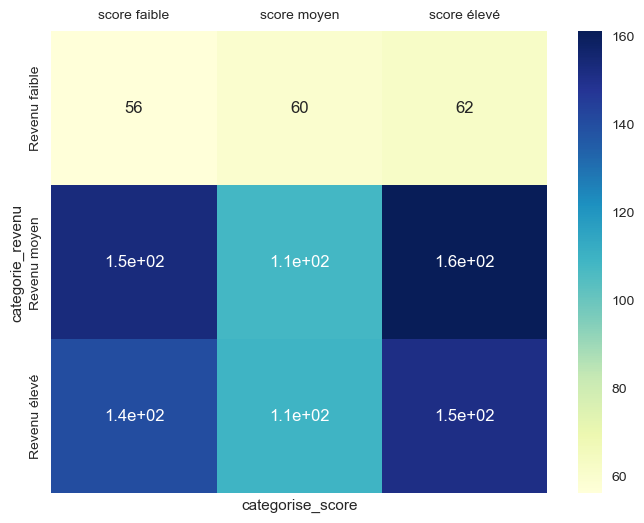

In [117]:
heat_categ_score('categorie_revenu')

### 3.8.6  Relation catégories préférées et catégories de score

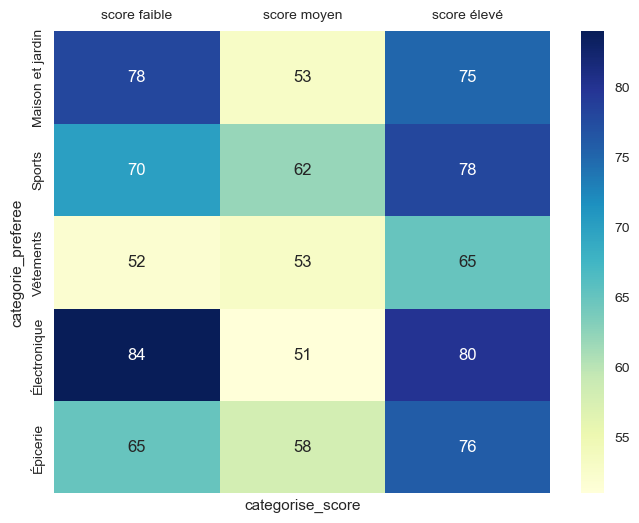

In [118]:
heat_categ_score('categorie_preferee')

# 4. Segmentation avec le revenu et le score

## 4.1 Colonnes selectionnées 

In [119]:
cols_num = client.select_dtypes( include=np.number).columns  # les colonnes numériques
cols_num

Index(['age', 'revenu', 'score_depenses', 'annees_adhesion', 'frequence_achat',
       'dernier_montant_achat'],
      dtype='object')

In [121]:
cols_select=['revenu', 'score_depenses']

## 4.2. Normaliser la table

In [122]:
scaler = StandardScaler()  # normaliser
scaler.fit(client[cols_select])

client_scaled = scaler.fit_transform(client[cols_select])
client_scaled_df = pd.DataFrame(
    client_scaled
)  # création d'un data avec nos valeurs standarisées
client_scaled_df.columns = ['revenu', 'score_depenses']
client_scaled_df

,revenu,score_depenses
0,0.316868,1.358468
1,-0.282016,0.321865
2,1.112778,-0.714738
3,-1.210096,0.805613
4,1.523374,-1.025718
...,...,...
995,0.691806,0.218205
996,-0.677034,0.874720
997,0.718900,-0.369203
998,0.736379,0.425525


## 4.3 Nombre de clusters avec KElbowVisualizer

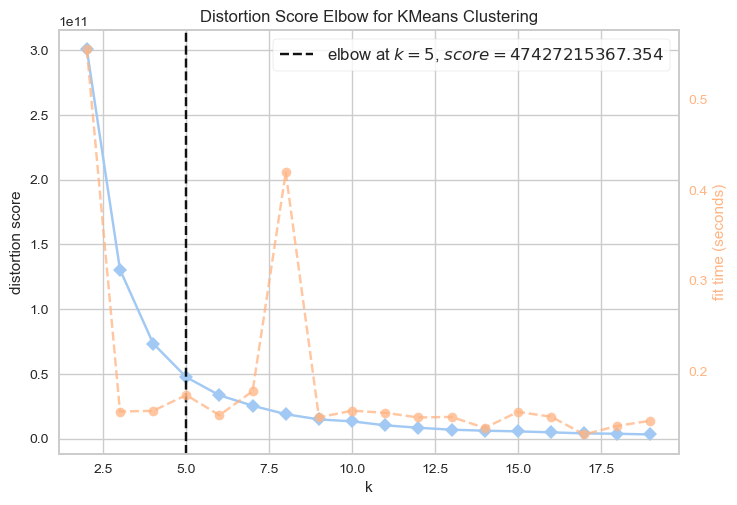

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [123]:
k_means = KMeans()
elbow = KElbowVisualizer(
    k_means, k=(2, 20)
)  # dans une plage de valeur de k compris entre 2 et 20
elbow.fit(
    client[cols_select]
)  # entraine avec notre table de réference Tableau_rfm2 pour le clustering
plt.savefig('nbr_cluster.png', dpi=300, bbox_inches='tight')
elbow.show()

## 4.4 Clusterisation avec k-means 

In [124]:
Table_kmeans=client[cols_select] # table utilisée pour kmeans

In [161]:
k_means = KMeans(n_clusters=5) #creation du modèle

In [162]:
k_means.fit(client_scaled_df)  # application du modèle sur les variables normalisées
clusters = k_means.labels_
print(np.unique(clusters))

[0 1 2 3 4]


In [163]:
pd.options.mode.copy_on_write = True 

In [164]:
Table_kmeans[
    "Cluster"
] = k_means.labels_  # ajout de la colonne cluster dans notre table
Table_kmeans

,revenu,score_depenses,Cluster
0,99342,90,1
1,78852,60,1
2,126573,30,0
3,47099,74,3
4,140621,21,0
...,...,...,...
995,112170,57,1
996,65337,76,3
997,113097,40,0
998,113695,63,4


In [165]:
Table_kmeans.columns

Index(['revenu', 'score_depenses', 'Cluster'], dtype='object')

## 4.5 Visualisation de Kmeans 

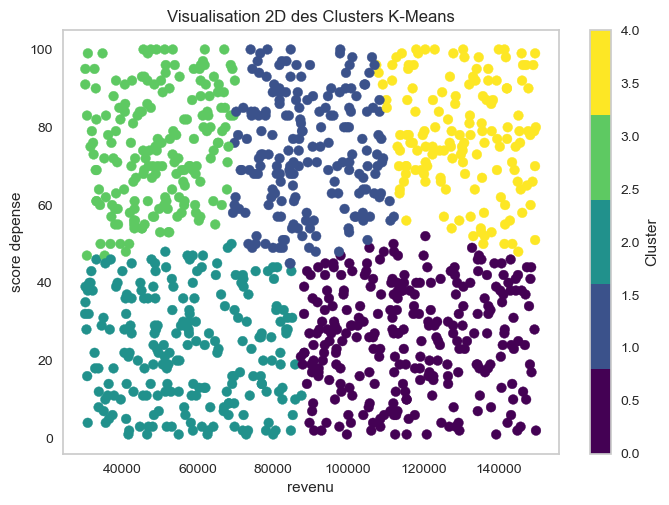

In [166]:
cmap = plt.get_cmap('viridis', 5)  # Choisir une colormap avec 5 couleurs
plt.scatter(data=Table_kmeans,x='revenu',y='score_depenses',c=clusters,cmap=cmap, marker='o')
plt.title('Visualisation 2D des Clusters K-Means')
plt.xlabel('revenu')
plt.ylabel('score depense')
plt.colorbar(label='Cluster')
plt.grid()
plt.savefig('segmentation_revenu_score.png', dpi=300, bbox_inches='tight')
plt.show()

## 4.6 Statistiques sur les clusters

### 4.6.1 Statistiques générales

In [167]:
Table_kmeans.head(3)

,revenu,score_depenses,Cluster
0,99342,90,1
1,78852,60,1
2,126573,30,0


In [168]:
# Réalisation d'un tableau statistique dont l'index est le numero de cluster
client_stat = (
    Table_kmeans.groupby("Cluster")
    .agg(
        score_depenses=pd.NamedAgg("score_depenses", "mean"),
        revenu=pd.NamedAgg("revenu", "mean"),
        cluster_size=pd.NamedAgg("Cluster", "count"),
    )
    .reset_index()
)

client_stat

,Cluster,score_depenses,revenu,cluster_size
0,0,25.722846,116664.441948,267
1,1,73.413043,89441.402174,184
2,2,23.157407,57326.879630,216
3,3,74.691892,49676.443243,185
4,4,77.628378,130550.189189,148


### 4.6.2 Statistiques et nommer les segments

**Clients Premium** : Ce groupe pourrait comprendre des clients avec un score élevé et des revenus annuels élevés. Ils représentent souvent des consommateurs fidèles et à fort potentiel.

**Acheteurs Occasionnels** : Ce cluster pourrait inclure des clients avec un score modéré mais des revenus annuels variables. Ils achètent de manière occasionnelle et pourraient être incités à acheter plus fréquemment.

**Clients à Faible Engagement** : Clients avec un score faible et des revenus bas. Cela pourrait être un groupe de clients qui n'interagissent pas beaucoup avec vos produits ou services.

**Clients Fidèles à Faible revenu** : Un groupe avec un bon score (forte fidélité) mais des revenus plus faibles. Cela pourrait indiquer une opportunité d'augmenter les ventes à ces clients.

**Clients avec Fort Potentiel** : Clients ayant un score élevé mais un revenu faible ou moyen. Cela pourrait traduire un potentiel de croissance si vous parvenez à les convertir en clients de valeur plus élevée.


In [169]:
# Réalisation d'un tableau statitique dont l'index est le numero de cluster
client_stat_2 = (
    Table_kmeans[['Cluster','score_depenses','revenu']].groupby('Cluster')
    .agg(["mean", "median", "min", "max", "count"]
    )
)
client_stat_2.sort_values(by=('score_depenses', 'mean'), ascending=False)

score_depenses                               revenu                    \
                  mean median min  max count           mean    median     min   
Cluster                                                                         
4            77.628378   77.5  48  100   148  130550.189189  130906.5  107488   
3            74.691892   74.0  47  100   185   49676.443243   49077.0   30058   
1            73.413043   72.5  45  100   184   89441.402174   86995.5   69362   
0            25.722846   27.0   1   52   267  116664.441948  114808.0   87418   
2            23.157407   23.0   1   50   216   57326.879630   56983.5   30004   

                       
            max count  
Cluster                
4        149936   148  
3         69864   185  
1        112170   184  
0        149973   267  
2         87595   216

In [181]:
# fonction pour nommer les segments
def apply_condition(Table_kmeans):
    if 100>=Table_kmeans['score_depenses'] >46 and 	Table_kmeans['revenu']<89300:
        return "Clients Fidèles à Faible revenu"
    
    elif 100>=Table_kmeans['score_depenses'] >47 and 90000<Table_kmeans['revenu']:
        return "Clients Premium"
    
    elif 100>=Table_kmeans['score_depenses']>35 and 89300<Table_kmeans['revenu']  < 150000:
        return "Clients avec Fort Potentiel"
   
    elif 53>Table_kmeans['score_depenses']  and 67000<Table_kmeans['revenu']<130000:
        return "Acheteurs Occasionnels"
    
    elif Table_kmeans['score_depenses'] <=50 and Table_kmeans['revenu']  < 89000:
        return "Clients à Faible Engagement"
    else:
        return "Autres"

In [182]:
# Applique la fonction et ajout à la table colonne segment
client_stat["Segment"]=client_stat.apply(apply_condition, axis=1)
client_stat = client_stat.sort_values(by='cluster_size', ascending=False)
client_stat

,Cluster,score_depenses,revenu,cluster_size,Segment
0,0,25.722846,116664.441948,267,Acheteurs Occasionnels
2,2,23.157407,57326.879630,216,Clients à Faible Engagement
3,3,74.691892,49676.443243,185,Clients Fidèles à Faible revenu
1,1,73.413043,89441.402174,184,Clients avec Fort Potentiel
4,4,77.628378,130550.189189,148,Clients Premium


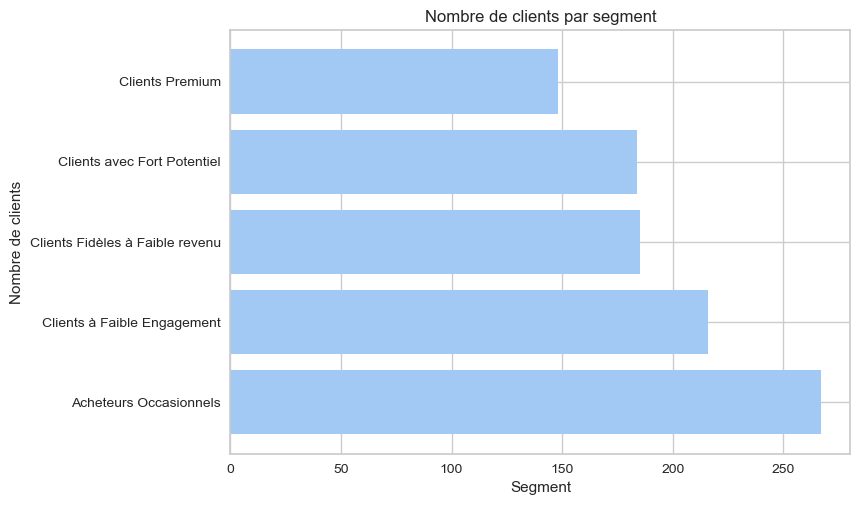

In [183]:
plt.barh(client_stat['Segment'], client_stat['cluster_size'])
plt.title('Nombre de clients par segment')
plt.xlabel('Segment')
plt.ylabel('Nombre de clients')
plt.show()

# 5 Le tableau pour envoyer les mails

## 5.1 Créer un dataframe avec l'identifiant, le segment et la catégorie préférée du client

In [184]:
client_final=client
client_final["Segment"]=client_final.apply(apply_condition, axis=1)
client_final.head()

,id,age,genre,revenu,score_depenses,annees_adhesion,frequence_achat,categorie_preferee,dernier_montant_achat,categorise_score,Trange_age,categorie_revenu,Segment
0,1,38,Femme,99342,90,3,24,Épicerie,113.53,score élevé,35-50 ans,Revenu moyen,Clients Premium
1,2,21,Femme,78852,60,2,42,Sports,41.93,score moyen,18-25 ans,Revenu moyen,Clients Fidèles à Faible revenu
2,3,60,Femme,126573,30,2,28,Vêtements,424.36,score faible,+50 ans,Revenu élevé,Acheteurs Occasionnels
3,4,40,Autre,47099,74,9,5,Maison et jardin,991.93,score élevé,35-50 ans,Revenu faible,Clients Fidèles à Faible revenu
4,5,65,Femme,140621,21,3,25,Électronique,347.08,score faible,+50 ans,Revenu élevé,Autres


In [186]:
# dataframe avec cuniquement les colonnes utiles
client_final=client_final[['id','Segment','categorie_preferee']]
client_final.head(3)

,id,Segment,categorie_preferee
0,1,Clients Premium,Épicerie
1,2,Clients Fidèles à Faible revenu,Sports
2,3,Acheteurs Occasionnels,Vêtements


## 5.2 Une phrase à envoyer par mail en fonction du type de client

* Clients Premium : 5% - Ces clients achètent déjà à plein tarif, donc une promotion modérée peut les inciter à acheter plus.

* Clients Fidèles à Faible Revenu : 20% - Une promotion plus importante pourrait encourager leur fidélité et augmenter leur volume d'achat.

* Clients avec Fort Potentiel : 15% - Attirer ces clients avec des promotions attrayantes peut les faire passer à un statut de clients réguliers.

* Clients à Faible Engagement : 25% - Ces clients peuvent avoir besoin d'incitations plus fortes pour les inciter à revenir.

* Acheteurs Occasionnels : 20% - Des promotions attractives peuvent les encourager à acheter plus fréquemment.

* Autres : 5%

In [187]:
client_final['Segment'].unique()

array(['Clients Premium', 'Clients Fidèles à Faible revenu',
       'Acheteurs Occasionnels', 'Autres', 'Clients à Faible Engagement',
       'Clients avec Fort Potentiel'], dtype=object)

In [192]:
def envoyer_mail(client_final):
    if client_final['Segment']=='Clients Premium':
        return "Vous êtes un de nos meilleurs client est vous avez -5% dans le rayon "+ client_final['categorie_preferee']
    elif client_final['Segment']=='Clients Fidèles à Faible revenu' :
        return "Vous êtes un de nos meilleurs client est vous avez -20% dans le rayon  "+client_final['categorie_preferee']
    elif client_final['Segment']=='Clients avec Fort Potentiel' :
        return "Vous avez -15% dans le rayon  "+client_final['categorie_preferee']+'. Profitez-en !'
    elif client_final['Segment']=='Clients à Faible Engagement' :
        return "Cela fait longtemps qu'on ne vous a pas vu, vous avez -25% dans le rayon  "+client_final['categorie_preferee']
    elif client_final['Segment']=='Acheteurs Occasionnels' :
        return "Venez profiter de -20 % de promotion dans le rayon  "+client_final['categorie_preferee']
    else:
        return "Profitez de moins 5 % dans le rayon "+client_final['categorie_preferee']

In [193]:
# ajouter la phrase au dataframe
client_final["mail"]=client_final.apply(envoyer_mail, axis=1)

In [194]:
client_final.head(3)

,id,Segment,categorie_preferee,mail
0,1,Clients Premium,Épicerie,Vous êtes un de nos meilleurs client est vous ...
1,2,Clients Fidèles à Faible revenu,Sports,Vous êtes un de nos meilleurs client est vous ...
2,3,Acheteurs Occasionnels,Vêtements,Venez profiter de -20 % de promotion dans le r...


In [195]:
# Lancer D-Tale pour une meilleur visibilité
d_client_final = dtale.show(client_final)
d_client_final

## 5.3 Exporter le dataframe en csv

In [196]:
# Exporter le DataFrame au format CSV
client_final.to_csv('client_mail.csv', index=False)